In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import scipy
import importlib
import os, sys
import seaborn as sns
import tqdm
# from pandas_datareader import data
import networkx as nx
sys.path.insert(0, 'C:/Users/User/Code/MMDGraph')

import graph_fun as gf
import importlib
importlib.reload(sys.modules['graph_fun'])

from rpy2.robjects.packages import importr
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
from rpy2.robjects import pandas2ri
rpy2.robjects.numpy2ri.activate()

Unable to determine R library path: Command '('C:\\PROGRA~1\\R\\R-41~1.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


Define function

# Read Data

<AxesSubplot:xlabel='date'>

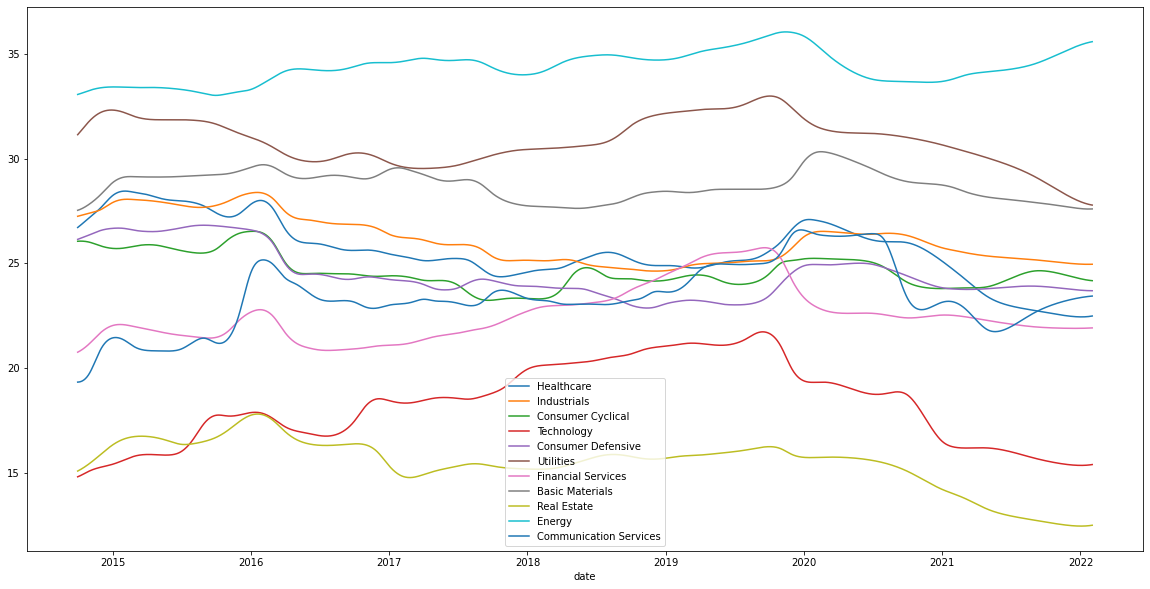

In [2]:
sector_gp = pd.read_pickle('../Yahoo/sector_gp.pkl')
sector_gp.plot(figsize = (20,10))

# Correlation

In [3]:
corr, prec = gf.rolling_correlation(sector_gp, 125, 5, "kendall")
dates = sector_gp.index[125::5]
dates = dates[:len(corr)]

In [4]:
Gs_esg_full_raw = []

for i in range(len(corr)):
    A = corr[i].copy()
    np.fill_diagonal(A,0)

    Gs_esg_full_raw.append(nx.from_numpy_matrix(A))

for i in range(len(Gs_esg_full_raw)):
    edges = {(i[0], i[1]): np.sign(i[2]) for i in list(Gs_esg_full_raw[i].edges(data = 'weight'))}
    nx.set_edge_attributes(Gs_esg_full_raw[i], edges, "sign")

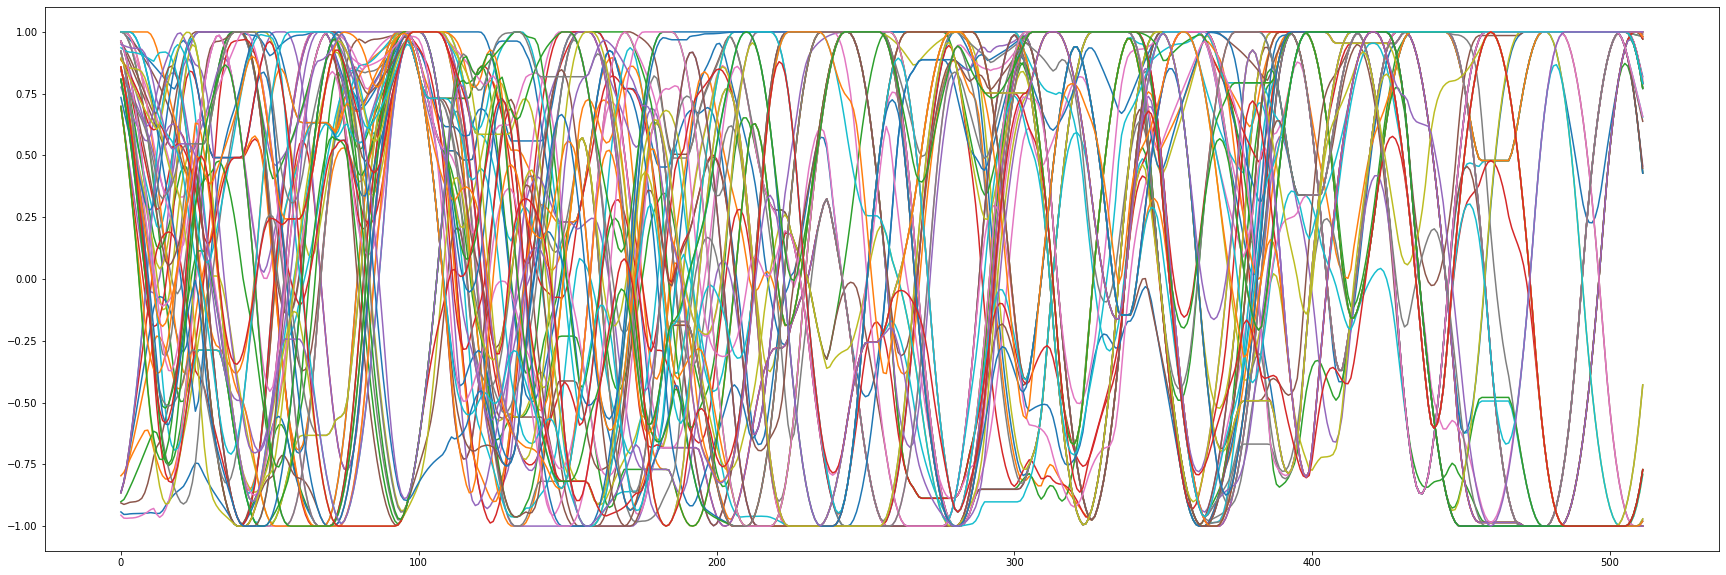

In [5]:
gf.plot_corr(corr)

In [6]:
importlib.reload(sys.modules['graph_fun'])
Gs_esg_full_w, Gs_esg_full, Gs_esg_full_signed = gf.gen_fullyconnected_threshold(corr, edge_type = None)
Gs_esg_full_w_pos, Gs_esg_full_pos, Gs_esg_full_signed_pos = gf.gen_fullyconnected_threshold(corr, edge_type = 'pos')
Gs_esg_full_w_neg, Gs_esg_full_neg, Gs_esg_full_signed_neg = gf.gen_fullyconnected_threshold(corr, edge_type = 'neg')

100%|██████████| 512/512 [00:07<00:00, 64.46it/s] 


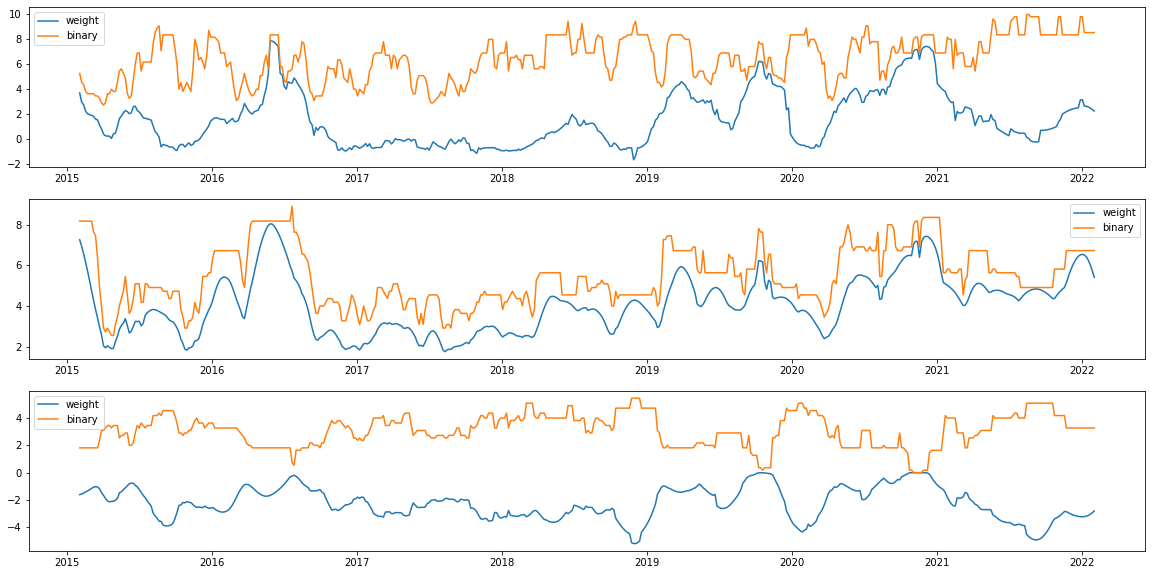

In [14]:
fig ,ax = plt.subplots(3,1, figsize = (20,10))

ax[0].plot(dates, gf.avg_degree_list(Gs_esg_full_w,  weight = 'weight'), label = 'weight')
ax[0].plot(dates,gf.avg_degree_list(Gs_esg_full), label = 'binary')
ax[0].legend()

ax[1].plot(dates,gf.avg_degree_list(Gs_esg_full_w_pos,  weight = 'weight'), label = 'weight')
ax[1].plot(dates,gf.avg_degree_list(Gs_esg_full_pos), label = 'binary')
ax[1].legend()

ax[2].plot(dates,gf.avg_degree_list(Gs_esg_full_w_neg,  weight = 'weight'), label = 'weight')
ax[2].plot(dates,gf.avg_degree_list(Gs_esg_full_neg), label = 'binary')
ax[2].legend()

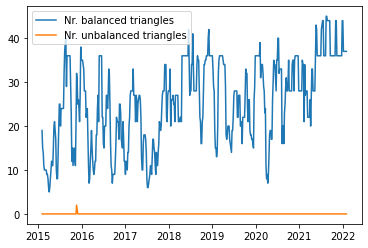

In [15]:
importlib.reload(sys.modules['graph_fun'])
balanced = [gf.cnt_balance(Gs_esg_full_signed[i])[0] for i in range(len(Gs_esg_full_signed))]
unbalanced = [gf.cnt_balance(Gs_esg_full_signed[i])[1] for i in range(len(Gs_esg_full_signed))]
plt.plot(dates, balanced, label = 'Nr. balanced triangles')
plt.plot(dates, unbalanced, label = 'Nr. unbalanced triangles')
plt.legend()

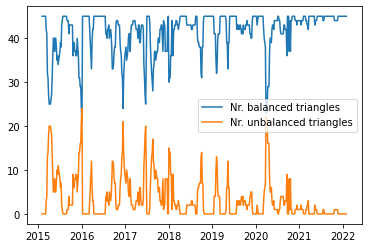

In [16]:
balanced = [gf.cnt_balance(Gs_esg_full_raw[i])[0] for i in range(len(Gs_esg_full_raw))]
unbalanced = [gf.cnt_balance(Gs_esg_full_raw[i])[1] for i in range(len(Gs_esg_full_raw))]
plt.plot(dates, balanced, label = 'Nr. balanced triangles')
plt.plot(dates, unbalanced, label = 'Nr. unbalanced triangles')
plt.legend()

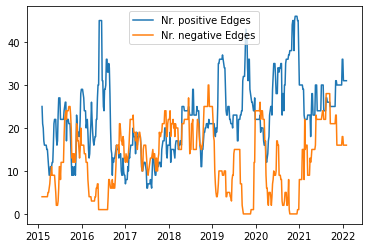

In [17]:
nr_pos = [gf.cnt_pos_neg(G, pos = 1) for G in Gs_esg_full_signed]
nr_neg = [gf.cnt_pos_neg(G, pos = -1) for G in Gs_esg_full_signed]
plt.plot(dates, nr_pos, label = 'Nr. positive Edges')
plt.plot(dates, nr_neg, label = 'Nr. negative Edges')
plt.legend()

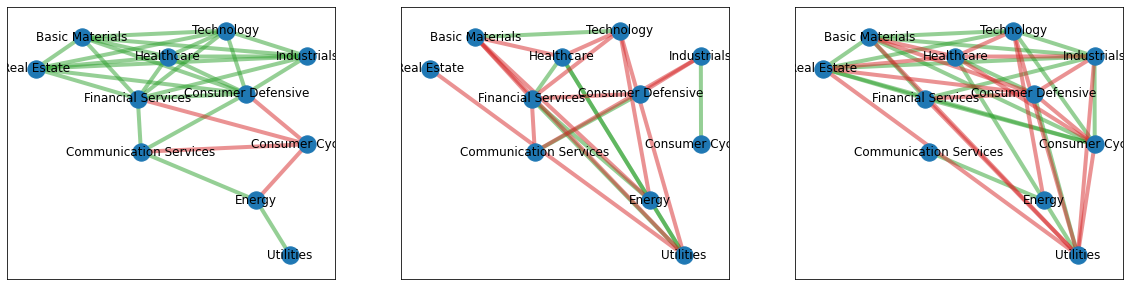

In [29]:
importlib.reload(sys.modules['graph_fun'])
pos = nx.kamada_kawai_layout(Gs_esg_full_signed[0], weight= None)
gf.plot_sign_network(Gs_esg_full_signed, [0, 50, 60], {i: sector for i, sector in enumerate(sector_gp.columns)}, (20,5), pos = pos)

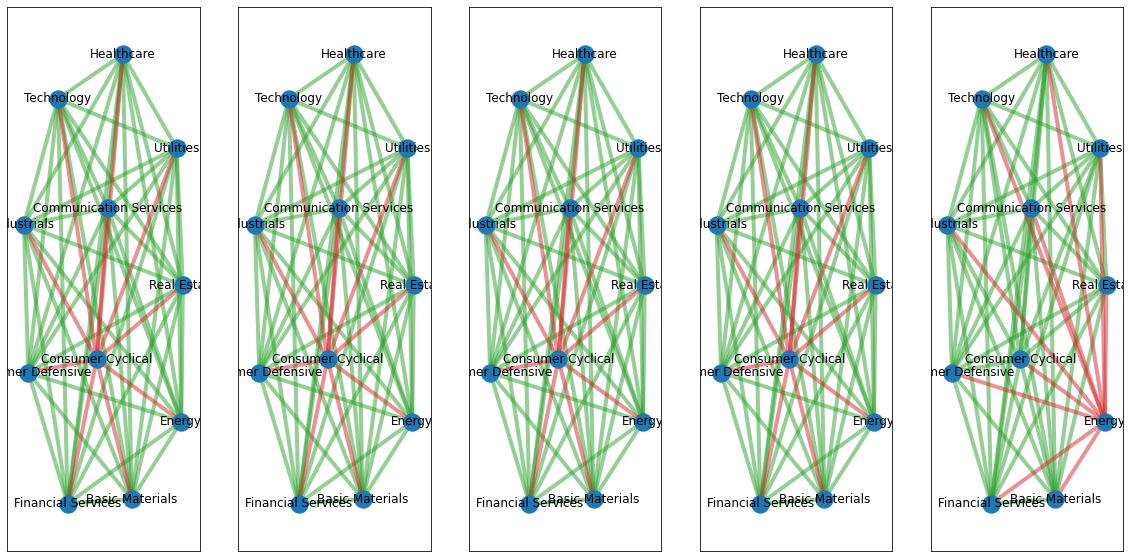

In [126]:
pos = nx.spring_layout(Gs_esg_full_raw[0],weight = None)
gf.plot_sign_network(Gs_esg_full_raw, [0, 1, 2, 3, 100], {i: sector for i, sector in enumerate(sector_gp.columns)}, (20,50), pos = pos)

In [ ]:

plt.plot(range(len(fully_connected_graphs)), ok)
import pickle
with open('../data/ESG_Graphs/Threshold/corr.pkl', 'wb') as handle:
    pickle.dump({'graphs':fully_connected_graphs, 'dates':dates}, handle)

with open('../data/ESG_Graphs/Threshold/sign.pkl', 'wb') as handle:
    pickle.dump({'graphs':fully_connected_graphs_signed, 'dates':dates}, handle)

# GP Return Price

In [4]:

esg_residuals =pd.DataFrame()
residuals = pd.DataFrame()

for sector in sector_gp.columns:
    sector_price_gp = pd.read_pickle(f"../data/gp_cv/{sector}.pkl")
    
    esg_residuals[f"{sector}"] = sector_price_gp['residuals']['residuals_esg']
    esg_residuals["time"] = sector_price_gp['residuals']['time']
    residuals[f"{sector}"] = sector_price_gp['residuals']['residuals']
    residuals["time"] = sector_price_gp['residuals']['time']

In [14]:
sector_price_gp['info']

,sector,time,lengthscale_1,lengthscale_2,objective_esg,Rsq_esg,variance_esg,lengthscale_m,objective_m,Rsq_m,variance
0,Communication Services,0,1.297013,0.160809,94.327529,0.934436,0.081633,0.536414,165.830352,3.157992e-01,0.693878
1,Communication Services,5,1.474900,0.196277,101.391950,0.908576,0.122449,0.610896,167.232686,2.849620e-01,0.653061
2,Communication Services,10,1.464580,0.193809,99.467426,0.909689,0.122449,1.092709,164.816319,2.860577e-01,0.816327
3,Communication Services,15,1.836985,0.212597,98.625518,0.909438,0.122449,0.000026,177.367317,9.983340e-01,0.040816
4,Communication Services,20,1.891121,0.264541,98.876084,0.905821,0.122449,0.000029,177.494720,1.283537e-06,0.938776
...,...,...,...,...,...,...,...,...,...,...,...
340,Communication Services,1700,3.538577,2.279428,7.853883,0.967192,0.040816,2.170017,98.708441,7.773110e-01,0.244898
341,Communication Services,1705,1.433670,0.091100,51.598921,1.000000,0.000000,1.887014,107.565109,7.461067e-01,0.285714
342,Communication Services,1710,1.319430,0.087698,60.992741,1.000000,0.000000,1.946671,127.002736,6.530902e-01,0.326531
343,Communication Services,1715,1.179220,0.080716,70.278021,1.000000,0.000000,0.000008,189.439020,3.117382e-07,2.000000


In [26]:
esg_residuals.loc[residuals['time'] == datetime.date(2015, 3, 3)].corr(method = 'kendall')

,Healthcare,Industrials,Consumer Cyclical,Technology,Consumer Defensive,Utilities,Financial Services,Basic Materials,Real Estate,Energy,Communication Services
Healthcare,1.000000,0.030710,-0.069161,-0.009032,0.022710,0.054710,-0.029935,-0.055484,0.324645,-0.065806,-0.119484
Industrials,0.030710,1.000000,0.129032,0.004387,-0.020129,0.119226,0.007742,0.138065,-0.085161,0.025032,0.111742
Consumer Cyclical,-0.069161,0.129032,1.000000,-0.113548,0.153032,0.045677,0.143742,0.032516,-0.078710,0.027871,0.390194
Technology,-0.009032,0.004387,-0.113548,1.000000,0.011871,-0.078968,-0.034065,0.031226,-0.094968,-0.231484,-0.041032
Consumer Defensive,0.022710,-0.020129,0.153032,0.011871,1.000000,0.163355,-0.105032,-0.133677,0.101419,-0.148645,0.036129
Utilities,0.054710,0.119226,0.045677,-0.078968,0.163355,1.000000,-0.281032,-0.210581,0.163355,0.008258,0.034581
Financial Services,-0.029935,0.007742,0.143742,-0.034065,-0.105032,-0.281032,1.000000,0.155871,-0.076129,-0.190452,0.013935
Basic Materials,-0.055484,0.138065,0.032516,0.031226,-0.133677,-0.210581,0.155871,1.000000,-0.220903,0.074581,0.062710
Real Estate,0.324645,-0.085161,-0.078710,-0.094968,0.101419,0.163355,-0.076129,-0.220903,1.000000,-0.087742,-0.132129
Energy,-0.065806,0.025032,0.027871,-0.231484,-0.148645,0.008258,-0.190452,0.074581,-0.087742,1.000000,0.047742


In [9]:
# Stationarity test of residuals
from statsmodels.tsa.stattools import adfuller
stationary_test_dict = {sector:[] for sector in sector_gp.columns}

for sector in sector_gp.columns:
    for i in np.unique(esg_residuals['time']):
        stationary_test_dict[sector].append(adfuller(residuals[sector].loc[residuals['time'] == i])[1])
    
    print(f"{sector}: {np.sum(np.array(stationary_test_dict[sector]) < 0.05)/len(stationary_test_dict['Healthcare'])}")


Healthcare: 0.5681159420289855
Industrials: 0.6347826086956522
Consumer Cyclical: 0.48695652173913045
Technology: 0.5159420289855072
Consumer Defensive: 0.47246376811594204
Utilities: 0.3652173913043478
Financial Services: 0.45507246376811594
Basic Materials: 0.5246376811594203
Real Estate: 0.45217391304347826
Energy: 0.3536231884057971
Communication Services: 0.5971014492753624


In [11]:
from statsmodels.tsa.stattools import adfuller
stationary_test_esg_dict = {sector:[] for sector in sector_gp.columns}

for sector in sector_gp.columns:
    for i in np.unique(esg_residuals['time']):
        stationary_test_esg_dict[sector].append(adfuller(esg_residuals[sector].loc[residuals['time'] == i])[1])
    
    print(f"{sector}: {np.sum(np.array(stationary_test_esg_dict[sector]) < 0.05)/len(stationary_test_esg_dict['Healthcare'])}")

Healthcare: 0.9478260869565217
Industrials: 0.9101449275362319
Consumer Cyclical: 0.881159420289855
Technology: 0.9014492753623189
Consumer Defensive: 0.8927536231884058
Utilities: 0.8927536231884058
Financial Services: 0.8927536231884058
Basic Materials: 0.8608695652173913
Real Estate: 0.8753623188405797
Energy: 0.9159420289855073
Communication Services: 0.8666666666666667


In [12]:
from statsmodels.stats.stattools import durbin_watson
autcorr_test_dict = {sector:[] for sector in sector_gp.columns}

for sector in sector_gp.columns:
    for i in np.unique(esg_residuals['time']):
        autcorr_test_dict[sector].append(durbin_watson(residuals[sector].loc[residuals['time'] == i]))
    
    print(f"{sector}: {np.sum(np.array(autcorr_test_dict[sector]) < 0.05)/len(autcorr_test_dict['Healthcare'])}")

Healthcare: 0.014492753623188406
Industrials: 0.020289855072463767
Consumer Cyclical: 0.07536231884057971
Technology: 0.02318840579710145
Consumer Defensive: 0.014492753623188406
Utilities: 0.08115942028985507
Financial Services: 0.020289855072463767
Basic Materials: 0.028985507246376812
Real Estate: 0.04057971014492753
Energy: 0.05507246376811594
Communication Services: 0.017391304347826087


In [13]:
from statsmodels.stats.stattools import durbin_watson
autcorr_test_esg_dict = {sector:[] for sector in sector_gp.columns}

for sector in sector_gp.columns:
    for i in np.unique(esg_residuals['time']):
        autcorr_test_esg_dict[sector].append(durbin_watson(esg_residuals[sector].loc[residuals['time'] == i]))
    
    print(f"{sector}: {np.sum(np.array(autcorr_test_esg_dict[sector]) < 0.05)/len(autcorr_test_esg_dict['Healthcare'])}")

Healthcare: 0.005797101449275362
Industrials: 0.002898550724637681
Consumer Cyclical: 0.0
Technology: 0.0
Consumer Defensive: 0.002898550724637681
Utilities: 0.0
Financial Services: 0.002898550724637681
Basic Materials: 0.0
Real Estate: 0.0
Energy: 0.002898550724637681
Communication Services: 0.008695652173913044


# Price Return and weighted ESG price return

Look at Corelation structures of $\log (r_t)$ and $\log (r_t)/ESG_t$.

In [39]:
# Read 
readRDS = ro.r['readRDS']
lgmrf_return = readRDS('../data/FinancialGraphs/SpectralHeavy/sector_price_change.rds')
lgmrf_return = dict(zip(lgmrf_return.names, map(list,list(lgmrf_return))))
lgmrf_return['dates'] = [pd.to_datetime((lgmrf_return['dates'][i]))[0] for i in range(len(lgmrf_return['dates']))]

lgmrf_esg_return = readRDS('../data/FinancialGraphs/SpectralHeavy/sector_esg_price_change.rds')
lgmrf_esg_return = dict(zip(lgmrf_esg_return.names, map(list,list(lgmrf_esg_return))))
lgmrf_esg_return['dates'] = [pd.to_datetime((lgmrf_esg_return['dates'][i]))[0] for i in range(len(lgmrf_esg_return['dates']))]


Gs_Lgmrf_return = [nx.from_numpy_matrix(A) for A in lgmrf_return['graphs']]
Gs_Lgmrf_esg_return = [nx.from_numpy_matrix(A) for A in lgmrf_esg_return['graphs']]
dates = lgmrf_esg_return['dates']

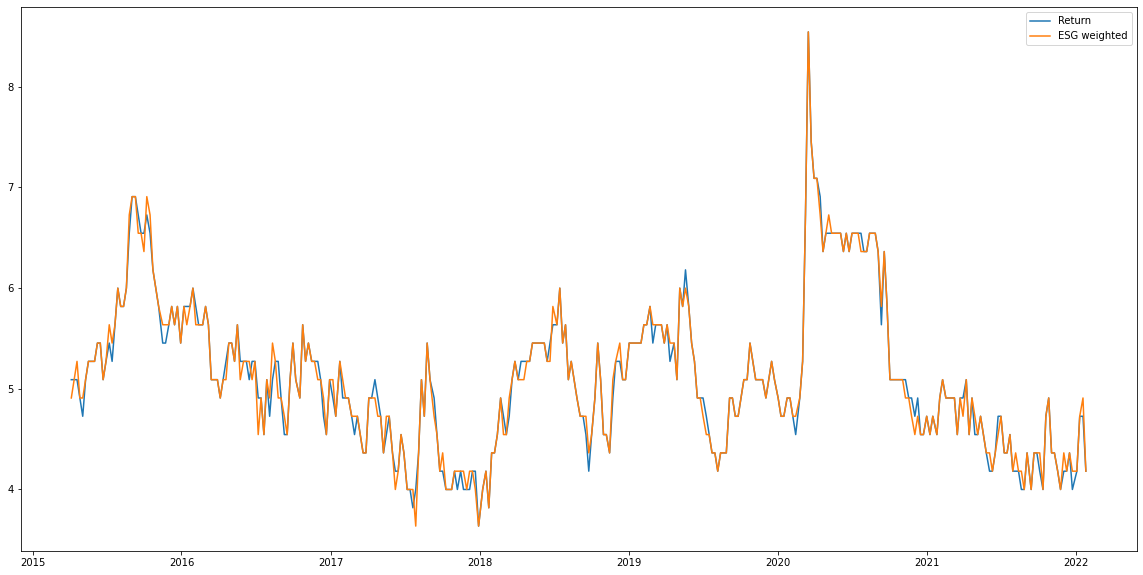

In [42]:
fig ,ax = plt.subplots(1,1, figsize = (20,10))

ax.plot(dates, gf.avg_degree_list(Gs_Lgmrf_return), label = 'Return')
ax.plot(dates,gf.avg_degree_list(Gs_Lgmrf_esg_return), label = 'ESG weighted')
ax.legend()


In [51]:
Gs_Lgmrf_return[0].edges(data = 'weight')

EdgeDataView([(0, 1, 0.14866311913098743), (0, 2, 0.3635441000451467), (0, 7, 0.272088650095008), (0, 8, 0.11332421036535614), (0, 10, 0.10244089400656785), (1, 2, 0.2688324131171281), (1, 4, 0.1360538531454315), (1, 6, 0.0015673654838404293), (1, 7, 0.15866208373808938), (1, 8, 0.035242535517685976), (1, 9, 0.25096117256346473), (2, 3, 0.1590559766099238), (2, 4, 0.10168923741567822), (2, 7, 0.08063650360556392), (2, 8, 0.026228646404408175), (3, 4, 0.01849003634628659), (3, 5, 0.785243915909639), (3, 7, 0.03714991247107687), (4, 6, 0.34233692830607265), (4, 7, 0.26952923322841343), (4, 9, 0.13192560232712164), (5, 7, 0.03731776466490387), (5, 9, 0.02347405618034281), (5, 10, 0.1540266512751316), (6, 9, 0.5934897548550703), (6, 10, 0.06272984538712985), (7, 8, 0.14456816418734708), (8, 10, 0.6806418196552118)])

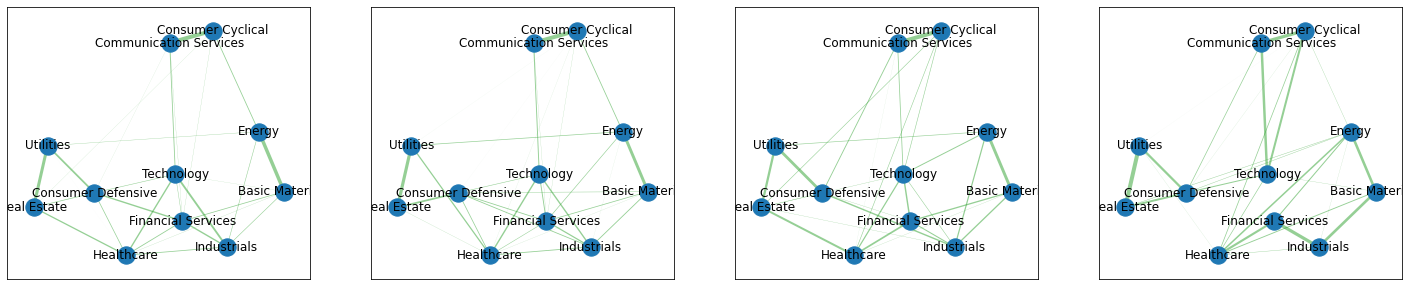

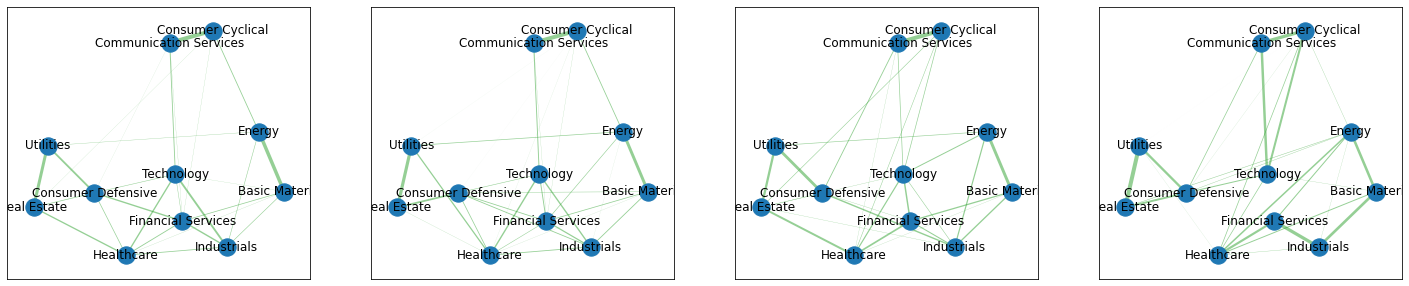

In [67]:
importlib.reload(sys.modules['graph_fun'])
pos = nx.spring_layout(Gs_Lgmrf_return[0])
gf.plot_sign_network(Gs_Lgmrf_return, [0, 10, 50, 100], {i: sector for i, sector in enumerate(lgmrf_return['stock_order'])}, (25,5), edge_name = 'weight', pos = pos)
gf.plot_sign_network(Gs_Lgmrf_esg_return, [0, 10, 50, 100], {i: sector for i, sector in enumerate(lgmrf_return['stock_order'])}, (25,5), edge_name = 'weight',pos = pos)

In [81]:
Gs_Lgmrf_return[0].edges[u][v]

TypeError: cannot unpack non-iterable int object

In [84]:
G = Gs_Lgmrf_return[0].copy()
edge_w = dict()
for e in G.edges():
    edge_w[e] = 4

nx.set_edge_attributes(G, values = edge_w, name = 'ok')

In [92]:
nx.attr_matrix(G, edge_attr= 'ok')

C:\Users\User\AppData\Local\Temp\ipykernel_13264\3159810544.py:1: FutureWarning: attr_matrix will return an numpy.ndarray instead of a numpy.matrix in NetworkX 3.0.
  nx.attr_matrix(G, edge_attr= 'ok')[0]


matrix([[0., 4., 4., 0., 0., 0., 0., 4., 4., 0., 4.],
        [4., 0., 4., 0., 4., 0., 4., 4., 4., 4., 0.],
        [4., 4., 0., 4., 4., 0., 0., 4., 4., 0., 0.],
        [0., 0., 4., 0., 4., 4., 0., 4., 0., 0., 0.],
        [0., 4., 4., 4., 0., 0., 4., 4., 0., 4., 0.],
        [0., 0., 0., 4., 0., 0., 0., 4., 0., 4., 4.],
        [0., 4., 0., 0., 4., 0., 0., 0., 0., 4., 4.],
        [4., 4., 4., 4., 4., 4., 0., 0., 4., 0., 0.],
        [4., 4., 4., 0., 0., 0., 0., 4., 0., 0., 4.],
        [0., 4., 0., 0., 4., 4., 4., 0., 0., 0., 0.],
        [4., 0., 0., 0., 0., 4., 4., 0., 4., 0., 0.]])